In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Report/Downloads/car_sales_data.csv")

In [3]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
df.tail()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630
49999,VW,Golf,1.4,Diesel,2012,109300,10400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [6]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [9]:
print(df.shape)

(50000, 7)


In [8]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [12]:
df.duplicated().sum()

12

In [13]:
df[df.duplicated()]

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
5426,VW,Polo,1.2,Petrol,2003,10000,8024
9862,Ford,Mondeo,1.4,Diesel,1987,224569,883
14745,BMW,Z4,2.4,Petrol,1999,12000,13410
19020,Toyota,Yaris,1.0,Petrol,1996,13500,5087
19337,VW,Polo,1.0,Petrol,2000,11500,5950
23927,VW,Polo,1.2,Petrol,2021,1000,27901
25368,VW,Golf,1.2,Diesel,2011,6000,17401
28576,VW,Polo,1.2,Petrol,2003,10000,8024
34246,VW,Passat,2.0,Diesel,2003,10000,16087
35647,Ford,Focus,1.6,Petrol,2019,2000,39636


In [14]:
df = df.drop_duplicates()

In [15]:
print("New dataset shape:", df.shape)

New dataset shape: (49988, 7)


In [16]:
import datetime
df["CarAge"] = datetime.datetime.now().year - df["Year of manufacture"]

In [17]:
df = df[["Manufacturer", "Model", "Engine size", "Fuel type", "Year of manufacture", "CarAge", "Mileage", "Price"]]

## data overview

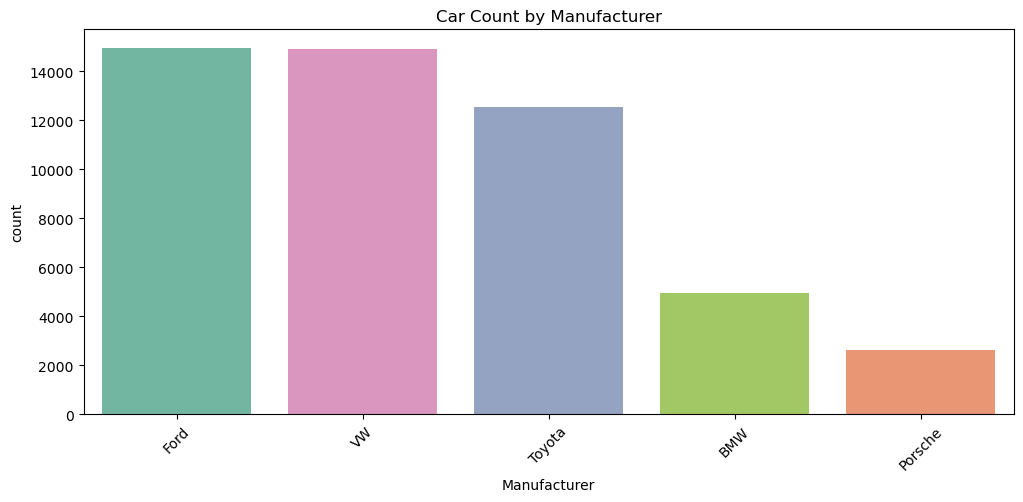

In [42]:
# Manufacturer distribution
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="Manufacturer", hue="Manufacturer", order=df["Manufacturer"].value_counts().index, palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Car Count by Manufacturer")
plt.show()

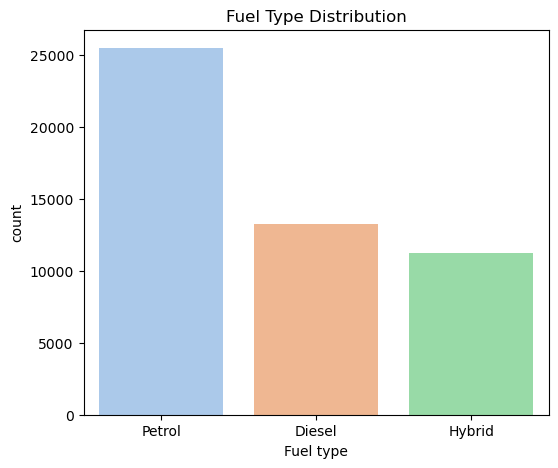

In [22]:
# Fuel type distribution
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Fuel type", hue="Fuel type", palette="pastel", legend=False)
plt.title("Fuel Type Distribution")
plt.show()

## price trend

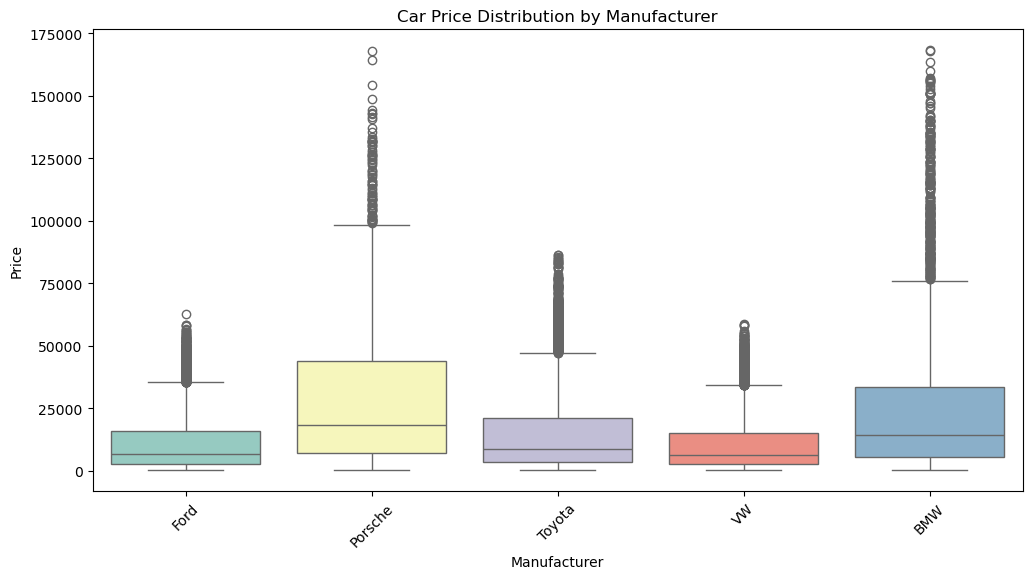

In [26]:
# Price by Manufacturer (Boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Manufacturer", y="Price", hue="Manufacturer", palette="Set3", legend=False)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Manufacturer")
plt.show()

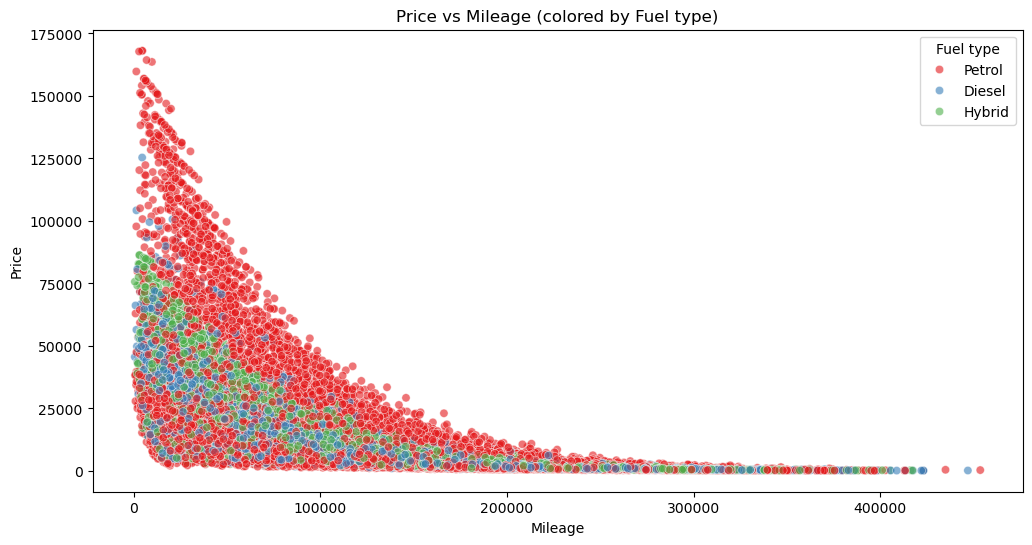

In [28]:
# Price vs Mileage
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Mileage", y="Price", hue="Fuel type", alpha=0.6, palette="Set1")
plt.title("Price vs Mileage (colored by Fuel type)")
plt.show()

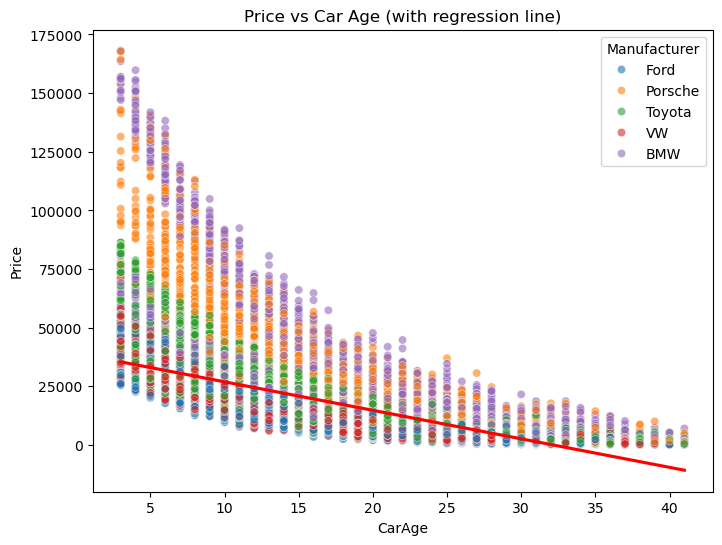

In [29]:
# Price vs Car Age
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="CarAge", y="Price", hue="Manufacturer", alpha=0.6, palette="tab10")
sns.regplot(data=df, x="CarAge", y="Price", scatter=False, color="red")
plt.title("Price vs Car Age (with regression line)")
plt.show()

## Engine&Fuel

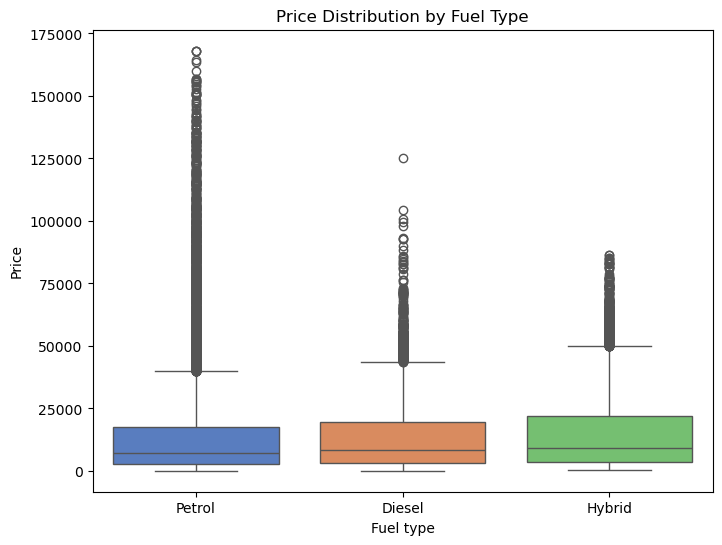

In [5]:
# Price vs Fuel type (Boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Fuel type", y="Price", hue="Fuel type", dodge=False, palette="muted", legend=False)
plt.title("Price Distribution by Fuel Type")
plt.show()



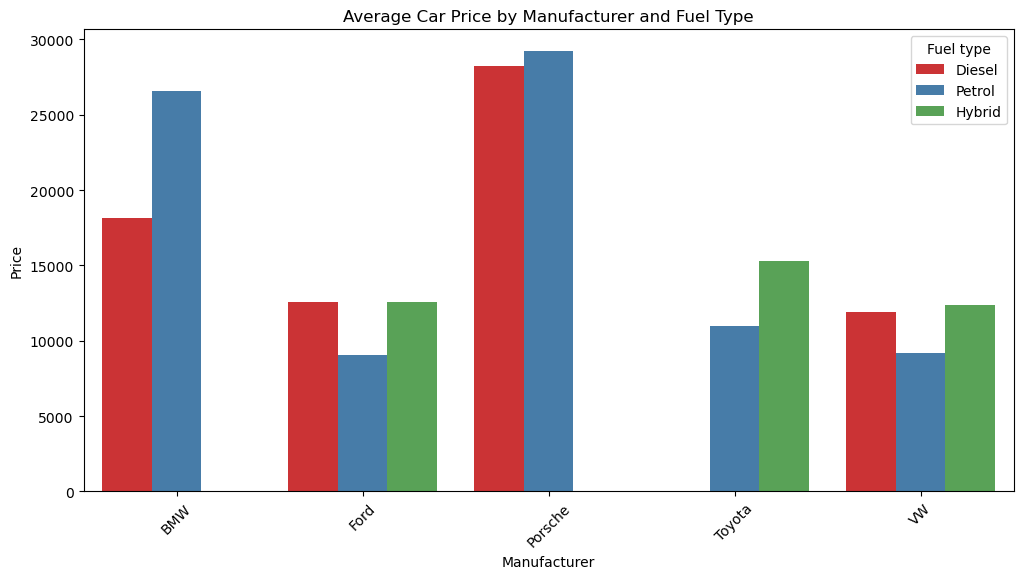

In [6]:
# Average Price by Fuel Type + Manufacturer
avg_price = df.groupby(["Manufacturer", "Fuel type"])["Price"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_price, x="Manufacturer", y="Price", hue="Fuel type", palette="Set1")
plt.xticks(rotation=45)
plt.title("Average Car Price by Manufacturer and Fuel Type")
plt.show()


## Modeling Insight

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


In [38]:
# Copy dataset
df_model = df.copy()

# Encode categorical variables
for col in ["Manufacturer", "Model", "Fuel type"]:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Features (X) and target (y)
X = df_model.drop("Price", axis=1)
y = df_model["Price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

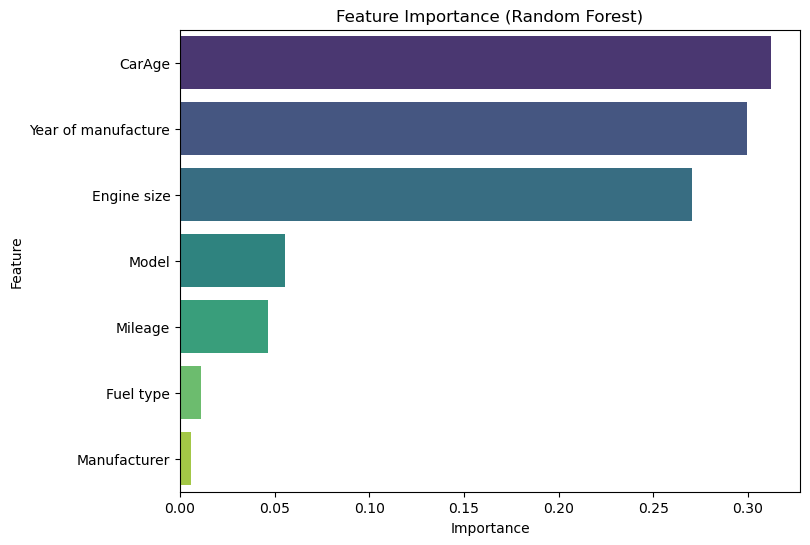

In [39]:
# Feature importance plot
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature", hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importance (Random Forest)")
plt.show()

Root Mean Squared Error (RMSE): 726.65
R² Score: 1.00


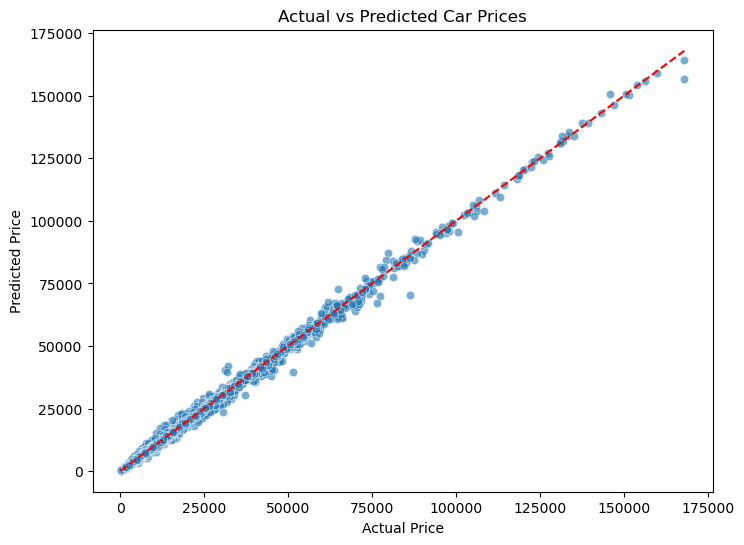

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # perfect line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()